## Star-Galaxy Classification (Experiment 3) using Classical ML Algorithms. We are using only photometric features as input to our models.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import numpy as np
np.random.seed(69)
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
sns.set()
# from tqdm.notebook 
import tqdm
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import time
import pickle

from sklearn.linear_model import SGDClassifier
# https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve, GridSearchCV


# 1. Create Train/Val/Test Sets

In [2]:
dnnx_sg = np.load("/scratch/srinadb/Foundation/Dataset/Experiment3/dnnx_sg_exp3.npy")
y_sg = np.load("/scratch/srinadb/Foundation/Dataset/Experiment3/y_sg_exp3.npy")
y_sg = np.argmax(y_sg, axis=1)
label_strings = ['GALAXY', 'STAR']

print('\n')
print(label_strings)




['GALAXY', 'STAR']


In [3]:
def get_metrics(y_pred, y_test, labels, to_print=True):
    correct_labels = np.where(y_pred==y_test)[0]
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred,average='macro')
    recall = metrics.recall_score(y_test, y_pred,average='macro')
    f1score = metrics.f1_score(y_test, y_pred,average='macro')
    # rocscore = metrics.roc_auc_score(y_test, y_pred,average='micro',multi_class="ovo")
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)  
    classification_report = metrics.classification_report(y_test, y_pred)

    if to_print:
        print("Identified {} correct labels out of {} labels".format(len(correct_labels), y_test.shape[0]))
        print("Accuracy:",accuracy)
        print("Precision:",precision)
        print("Recall:",recall)
        print("F1 Score:",f1score)
        # print("ROC AUC Score:",rocscore)
        print(f"Labels are: {labels}")
        print("Confusion Matrix:\n", confusion_matrix)
        print("Classification_Report:\n", classification_report)

    return (correct_labels, accuracy, precision, recall, confusion_matrix, classification_report)

In [4]:
def plot_model_change(history,fname="output/time.pdf"):
    # summarize history for accuracy
    plt.plot(history.history['accuracy'],label="Training Acc")
    plt.plot(history.history['val_accuracy'],label="Val Acc")
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'],label="Training Loss")
    plt.plot(history.history['val_loss'],label="Val Loss")
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.savefig(fname)
    plt.show()

# ML Algorithms

## DT Classifier

In [5]:
# Path to your saved model
model_path = "ml_pf_classifiers/EX1_SG_DT_Model.pkl"

# Load the model
with open(model_path, "rb") as f:
    DT = pickle.load(f)



In [6]:
y_test_pred_dt = DT.predict_proba(dnnx_sg)
y_test_pred_dt = np.argmax(y_test_pred_dt, axis=1)

In [7]:
print(get_metrics(y_test_pred_dt, y_sg, label_strings))

Identified 16714 correct labels out of 19022 labels
Accuracy: 0.8786668068552203
Precision: 0.8946840674463707
Recall: 0.8786668068552204
F1 Score: 0.8774231889293347
Labels are: ['GALAXY', 'STAR']
Confusion Matrix:
 [[9315  196]
 [2112 7399]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89      9511
           1       0.97      0.78      0.87      9511

    accuracy                           0.88     19022
   macro avg       0.89      0.88      0.88     19022
weighted avg       0.89      0.88      0.88     19022

(array([    0,     1,     2, ..., 19019, 19020, 19021]), 0.8786668068552203, 0.8946840674463707, 0.8786668068552204, array([[9315,  196],
       [2112, 7399]]), '              precision    recall  f1-score   support\n\n           0       0.82      0.98      0.89      9511\n           1       0.97      0.78      0.87      9511\n\n    accuracy                           0.88     19022\n   macro avg       

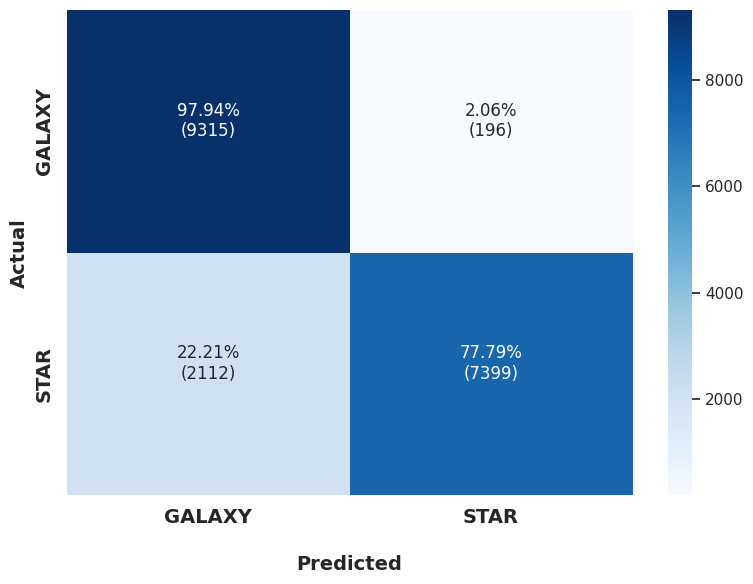

In [8]:
# https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/#google_vignette
# fig = plt.figure()
cf_matrix = metrics.confusion_matrix(y_sg, y_test_pred_dt)
cf_matrix_percentage = metrics.confusion_matrix(y_sg, y_test_pred_dt, normalize='true')
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_percentage.flatten()]
labels = [f"{v1}\n({v2})\n" for v1, v2 in
          zip(group_percentages,group_counts)]
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the size as needed

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_xlabel('\nPredicted', fontsize=14, weight='bold')
ax.set_ylabel('Actual', fontsize=14, weight='bold');
ax.xaxis.set_ticklabels(['GALAXY', 'STAR'], fontsize=14, weight='bold')
ax.yaxis.set_ticklabels(['GALAXY', 'STAR'], fontsize=14, weight='bold')
plt.tight_layout()
plt.savefig("ml_pf_classifiers/EX3_SG_DT_CM.png")
plt.show()
plt.close()

## RF Classifier

In [9]:
# Path to your saved model
model_path = "ml_pf_classifiers/EX1_SG_RF_Model.pkl"

# Load the model
with open(model_path, "rb") as f:
    RF = pickle.load(f)



In [10]:
y_test_pred_rf = RF.predict_proba(dnnx_sg)
y_test_pred_rf = np.argmax(y_test_pred_rf, axis=1)

In [11]:
print(get_metrics(y_test_pred_rf, y_sg, label_strings))

Identified 17002 correct labels out of 19022 labels
Accuracy: 0.8938071706445169
Precision: 0.9081678892471183
Recall: 0.8938071706445169
F1 Score: 0.8928648267487612
Labels are: ['GALAXY', 'STAR']
Confusion Matrix:
 [[9393  118]
 [1902 7609]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.83      0.99      0.90      9511
           1       0.98      0.80      0.88      9511

    accuracy                           0.89     19022
   macro avg       0.91      0.89      0.89     19022
weighted avg       0.91      0.89      0.89     19022

(array([    0,     1,     2, ..., 19019, 19020, 19021]), 0.8938071706445169, 0.9081678892471183, 0.8938071706445169, array([[9393,  118],
       [1902, 7609]]), '              precision    recall  f1-score   support\n\n           0       0.83      0.99      0.90      9511\n           1       0.98      0.80      0.88      9511\n\n    accuracy                           0.89     19022\n   macro avg       

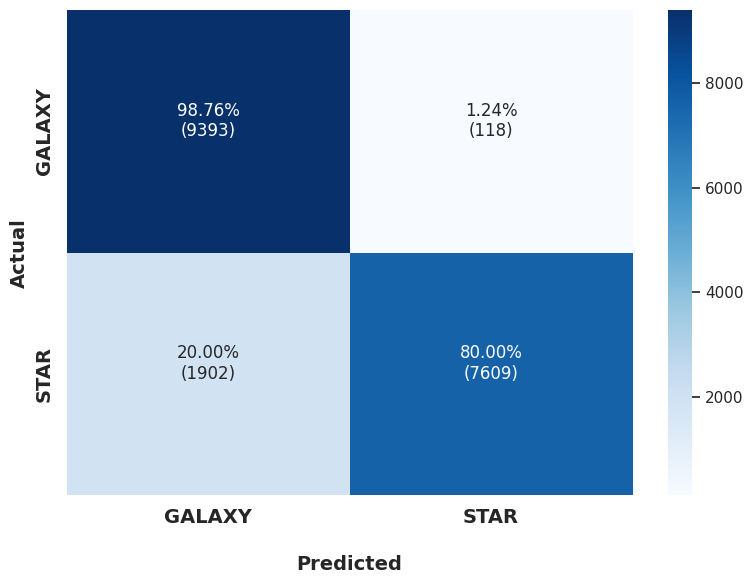

In [12]:
# https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/#google_vignette
# fig = plt.figure()
cf_matrix = metrics.confusion_matrix(y_sg, y_test_pred_rf)
cf_matrix_percentage = metrics.confusion_matrix(y_sg, y_test_pred_rf, normalize='true')
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_percentage.flatten()]
labels = [f"{v1}\n({v2})\n" for v1, v2 in
          zip(group_percentages,group_counts)]
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the size as needed

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_xlabel('\nPredicted', fontsize=14, weight='bold')
ax.set_ylabel('Actual', fontsize=14, weight='bold');
ax.xaxis.set_ticklabels(['GALAXY', 'STAR'], fontsize=14, weight='bold')
ax.yaxis.set_ticklabels(['GALAXY', 'STAR'], fontsize=14, weight='bold')
plt.tight_layout()
plt.savefig("ml_pf_classifiers/EX3_SG_RF_CM.png")
plt.show()
plt.close()

## GBDT Classifier

In [13]:
# Path to your saved model
model_path = "ml_pf_classifiers/EX1_SG_GBDT_Model.pkl"

# Load the model
with open(model_path, "rb") as f:
    GBDT = pickle.load(f)



In [14]:
y_test_pred_gbdt = GBDT.predict_proba(dnnx_sg)
y_test_pred_gbdt = np.argmax(y_test_pred_gbdt, axis=1)

In [15]:
print(get_metrics(y_test_pred_gbdt, y_sg,label_strings))

Identified 17303 correct labels out of 19022 labels
Accuracy: 0.9096309536326359
Precision: 0.9191730723303113
Recall: 0.9096309536326359
F1 Score: 0.9091137163841698
Labels are: ['GALAXY', 'STAR']
Confusion Matrix:
 [[9369  142]
 [1577 7934]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      9511
           1       0.98      0.83      0.90      9511

    accuracy                           0.91     19022
   macro avg       0.92      0.91      0.91     19022
weighted avg       0.92      0.91      0.91     19022

(array([    0,     1,     2, ..., 19019, 19020, 19021]), 0.9096309536326359, 0.9191730723303113, 0.9096309536326359, array([[9369,  142],
       [1577, 7934]]), '              precision    recall  f1-score   support\n\n           0       0.86      0.99      0.92      9511\n           1       0.98      0.83      0.90      9511\n\n    accuracy                           0.91     19022\n   macro avg       

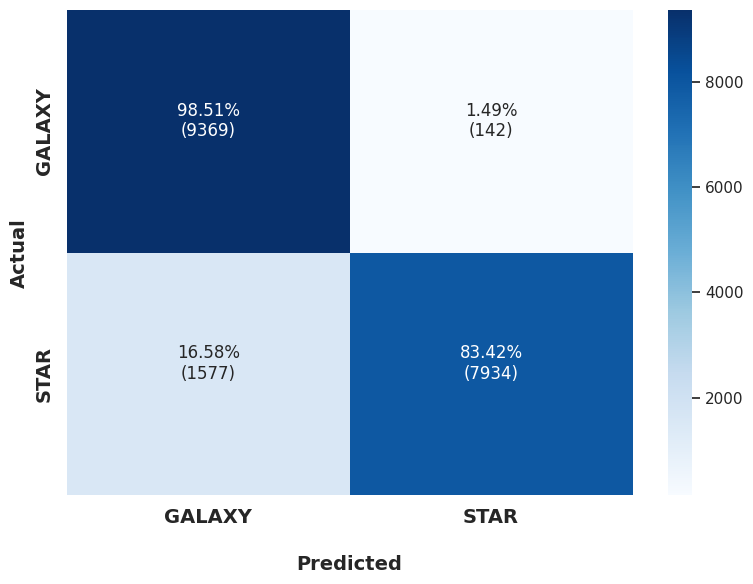

In [16]:
# https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/#google_vignette
# fig = plt.figure()

cf_matrix = metrics.confusion_matrix(y_sg, y_test_pred_gbdt)
cf_matrix_percentage = metrics.confusion_matrix(y_sg, y_test_pred_gbdt, normalize='true')
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_percentage.flatten()]
labels = [f"{v1}\n({v2})\n" for v1, v2 in
          zip(group_percentages,group_counts)]
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the size as needed

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_xlabel('\nPredicted', fontsize=14, weight='bold')
ax.set_ylabel('Actual', fontsize=14, weight='bold');
ax.xaxis.set_ticklabels(['GALAXY', 'STAR'], fontsize=14, weight='bold')
ax.yaxis.set_ticklabels(['GALAXY', 'STAR'], fontsize=14, weight='bold')
plt.tight_layout()
plt.savefig("ml_pf_classifiers/EX3_SG_GBDT_CM.png")
plt.show()
plt.close()